# Regressão Logística

Apesar de possuir o termo "Regressão" em seu nome, a Regressão logística é um algoritmo destinado aos problemas de **classificação** cuja saída é discreta, ou seja, $y \in \{0, 1, 2, ..., c\}$.

## Classificação Binária

A classificação binária é a classe de problemas em que $c = 1$, ou seja, o modelo deve distinguir entre as duas classes, a positiva quando $y=1$ e negativa quando $y=0$.  

A imagem abaixo ilustra um problema clássico de classificação binária em que o classificador deve ser capaz de distinguir entre as classes, gato(y = 1) e cachorro(y = 0), dado somente o peso e comprimento do animal.

<img src="imgs/logistic_regression.png" alt="linear_model" width="800" style="display:block; margin:auto"/>

<div align="center">
Figura 1 - Distinção entre as classes cachorro e gato.
</div>

### Modelo

Nos problemas de classificação é necessário mapear a saída do modelo $h_\theta(x)$, que possui como imagem os números reais, no intervalo $\{0, 1\}$. Uma alternativa neste sentido é a função **sigmóide**, apresentada e implementada a seguir. 

$$g(z) = \frac{1}{1+e^{-z}}$$

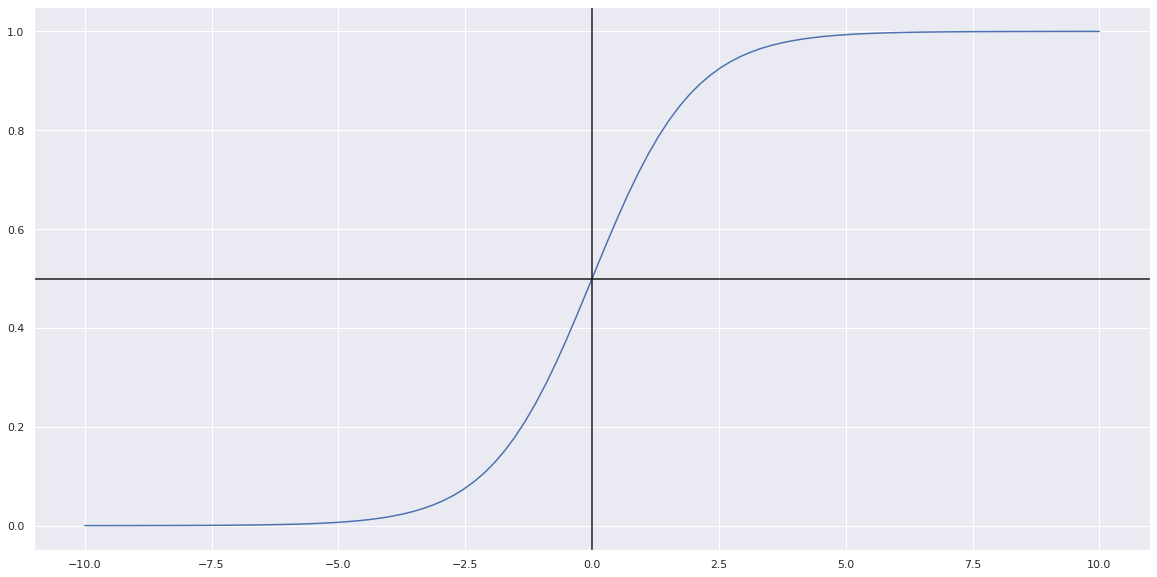

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def sigma(z):
    """
    Logistic function
    Arguments:
        z: np.array (mx1)
    Returns:
        np.array (mx1)
    """
    return 1/(1 + np.exp(-z))

# plot sigma function
m = 100
x = np.linspace(-10, 10, m).reshape(m, 1)
y = sigma(x)

fig = plt.figure(figsize=(20,10))
plt.plot(x, y)
plt.axvline(x = 0, color = 'k')
plt.axhline(y = 0.5, color = 'k')

Aplicando o modelo já desenvolvido para regressão linear na função sigmóide obtemos um modelo não linear para regressão logística que mapeia as entradas no intervalo $\{0,1\}$.

$$h_\theta(x) = g(\theta^T x)$$
$$h_\theta(x) = \frac{1}{1+e^{-\theta^T x}}$$

O modelo para regressão logística é implementado abaixo.

In [15]:
def add_ones_column(x):
    """
    Append ones on first column ([a b c] -> [1 a b c])
    Arguments:
        x: np.array (mxn)
    Returns:
        np.array (mxn+1)
    """
    [m, n] = np.shape(x)
    new_x = np.zeros([m, n+1])
    new_x[:,0] = np.ones(m)
    new_x[:,1:] = x[:, 0:]

    return new_x

def h(x, o):
    """
    Logistic regression model: sigma(o^Tx)
    Arguments:
        x: np.array (mxn)
        o: np.array (n+1xk)
    Returns:
        np.array (mxk)
    """
    x = add_ones_column(x)
    return sigma(np.dot(x, o))

Como consequência, a saída do modelo fornecerá não somente a classe estimada, mas também o grau de confiança da estimativa. Afinal $h_\theta(x) = P(y = 1 | x;\theta)$, ou seja, $h_\theta(x)$ indica a probabilidade da saída ser $1$ dado $x$ e $\theta$.

Devido ao caráter binário e portanto complementar da saída, ao estimar a probabilidade de uma das classes também estimamos a da outra. Afinal,  $P(y = 1 | x;\theta) + P(y = 0 | x;\theta) = 1$. Em outras palavras, $h_\theta(x) = 0.7$ indica $70\%$ de probabilidade da saída ser $1$ e $30\%$ dela ser $0$.

É plausível assumir estimativas iguais ou superiores a $50\%$ como $1$ e inferiores como $0$.

$$h_\theta(x) \geq 0.5 \rightarrow 1$$
$$h_\theta(x) < 0.5 \rightarrow 0$$

Ademais, inspecionando o gráfico da função sigmóide podemos verificar que:

$$g(z) \geq 0.5, \forall z \geq 0$$

Como consequência:

$$\theta^T x \geq 0 \rightarrow y = 1$$

Em outras palavras, a estimativa do modelo será $1$ sempre que o produto $\theta^T x$ for maior ou igual a $0$. Sendo assim, a definição dos parâmetros do modelo em conjunto com a aplicação da função sigmóide resulta em uma **fronteira de decisão**, ilustrada pelo exemplo a seguir.

### Fronteira de Decisão

O modelo $h_\theta(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2$ de parâmetros $\theta = \begin{bmatrix} -3 & 1 & 1 \end{bmatrix}$ quando empregado em um regressor logístico resulta na seguinte fronteira de decisão:

$$-3 + x_1 + x_2 \geq 0 \rightarrow y = 1$$
$$x_1 + x_2 \geq 3 \rightarrow y = 1$$

<img src="imgs/bondary_decision.png" alt="linear_model" width="200" style="display:block; margin:auto"/>

<div align="center">
Fronteira de Decisão.
</div>

Para o conjunto de dados ilustrado pela figura acima os pontos assinalados com 'x' seriam classificados como pertencentes a classe $1$ e os demais como integrantes da classe $0$. 

Dados os parâmetros $\theta$ do modelo e o conjunto de entrada $x$ a equação da fronteira de decisão pode ser reescrita de tal forma a facilitar sua visualização no conjunto de dados. O exemplo a seguir ilustra o processo para um modelo com duas entradas: 

$$\theta_0 + \theta_1 x_1 + \theta_2 x_2 = 0 $$
$$x_2 = -\frac{\theta_1}{\theta_2} x_1 - \frac{\theta_0}{\theta_2}$$

In [16]:
def boundary_decision(x, o):
    """
    Boundary decision for h = o0 + o1x1 + o2x2
    Arguments:
        x: np.array (mxn)
        o: np.array (n+1x1)
    Returns:
        np.array (mx1)
    """
    return -o[1]/o[2]*x[:,0] -o[0]/o[2] 

Ademais, a complexidade na forma da fronteira é dada pela complexidade do modelo, o modelo $h_\theta(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1^2 + \theta_4 x_2^2$ de parâmetros $\theta = \begin{bmatrix} -1 & 0 & 0 & 1 & 1 \end{bmatrix}$ implica na seguinte fronteira:

$$x_1^2 + x_2^2 \geq 1 \rightarrow y = 1$$

<img src="imgs/bondary_decision_1.png" alt="linear_model" width="200" style="display:block; margin:auto"/>

<div align="center">
Fronteira de Decisão Circular.
</div>

### Otimização

A definição dos parâmetros que minimizam o custo do modelo na regressão logística é dificultada devido a não linearidade da função sigmóide. Os scripts a seguir ilustram este fato para o modelo $h_\theta(x) = g(\theta_0 + \theta_1 x_1)$ quando utilizada como custo a metade da métrica MSE.

In [17]:
def half_MSE(x, o, y):
    """
    Half mean squared error
    Arguments:
        x: np.array (mxn)
        o: np.array (n+1xk)
        y: np.array (mx1)
    Returns:
        double (half mse)
    """
    m = np.shape(x)[0]
    h_x = h(x, o)
    e = h_x - y
    return np.dot(np.transpose(e), e)*1/(2*m)

def J_for_multiple_o_set(x, o, y, J):
    """
    Cost function for each o set
    Arguments:
        x: np.array (mxn)
        o: np.array (n+1xk)
        y: np.array (mx1)
    Returns:
        np.array (1xk)
    """
    j_hist = []
    k = np.shape(o)[1]
    for i in range(k):
        o_k = np.vstack(o[:, i])
        j_hist.append(J(x, o_k, y))
    
    return np.hstack(j_hist)

def plot_cost(x, o, y, J):
    """
    Plot J
    Arguments:
        x: np.array (mxn)
        o: np.array (n+1xk)
        y: np.array (mx1)
        J: point of function
    Returns:

    """
    # prepare data in meshgrid format
    X, Y = np.meshgrid(o[0], o[1])
    
    # serialize meshgrid to use J
    c_o = np.power(len(o[1]), 2)
    o = np.zeros((2, c_o))
    o[0, :] = np.reshape(X, [1, c_o])
    o[1, :] = np.reshape(Y, [1, c_o])
    j = J_for_multiple_o_set(x, o, y, J)

    # transform j to meshgrid
    Z = np.reshape(j, np.shape(X))
    
    # plot
    fig = plt.figure(figsize=(20,10))
    # surface
    ax = fig.add_subplot(121, projection='3d')
    ax.set_xlabel(r'$\theta_{0}$')
    ax.set_ylabel(r'$\theta_{1}$')
    
    ax.plot_surface(X, Y, Z, alpha=0.2)

O script a seguir compõem um vetor de saída arbitrário, porém balanceado, isto é, com a mesma quantidade de exemplos de treinamento para cada classe.

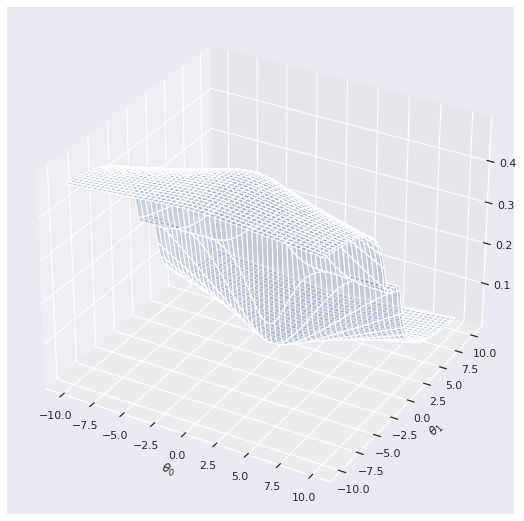

In [18]:
# arbitrary data to visualize cost function
y = np.zeros(m).reshape(m, 1)
y[int(0.5*m):] = 1
m = 100
o1 = np.linspace(-10, 10, m)
o2 = o1
plot_cost(x, [o1, o2], y, half_MSE)

Este exemplo reflete a baixa inclinação da curva de custo em algumas regiões, que ocorre quando nem mesmo uma variação brusca dos parâmetros $\theta$ implicam em alteração no custo do modelo. Afinal, $(y - h_\theta(g(-30 -30x)))^2$ e $(y - h_\theta(g(30 -10 x)))^2$ produzirão saídas semelhantes. 

A suavidade quando levada ao limite culmina na multiplicidade de mínimos locais da função custo refletindo sua forma não convexa, como consequência a minimização do através do gradiente descendente é dificultada. Posto isto, uma função custo alternativa é proposta a seguir.

Com o objetivo de aumentar a penalização do modelo para estimativas erradas e assim aumentar a inclinação da curva de custo, podemos utilizar a seguinte função custo:

$$J(\theta) = \frac{-1}{m} \sum\limits_{i=1}^{m} y^{i} (log(h_{\theta}(x^{i})) + (1 - y^{i}) (log(1 - h_{\theta}(x^{i}))$$

Implementada no seguine script:

In [19]:
def log_without_nan(x):
    """
    Transforms nan to number
    Arguments:
        x: np.array (mx1)
    Returns:
        np.array (mx1)
    """
    return np.nan_to_num(np.log(x))

def logistic_regression_cost(x, o, y):
    """
    Logistic regression cost
    Arguments:
        x: np.array (mxn)
        o: np.array (n+1xk)
        y: np.array (mx1)
    Returns:
        double (half mse)
    """
    m = np.shape(x)[0]
    h_x = h(x, o) # mxn
    y_t = np.transpose(y) # mx1 -> 1xm

    J = np.dot(y_t, (log_without_nan(h_x))) + np.dot((1-y_t),(log_without_nan(1 - h_x))) # 1xn

    return -J/m

O objetivo desta função é utilizar $- log(h_{\theta}(x))$ como custo quando $y = 1$ e $- log(1 - h_{\theta}(x))$ quando $y = 0$. Conforme pode ser verificado no script abaixo, agora o custo é aumentado de forma logarítmica conforme a diferença entre estimativa $h_{\theta}(x)$ e a saída desejada $y$.

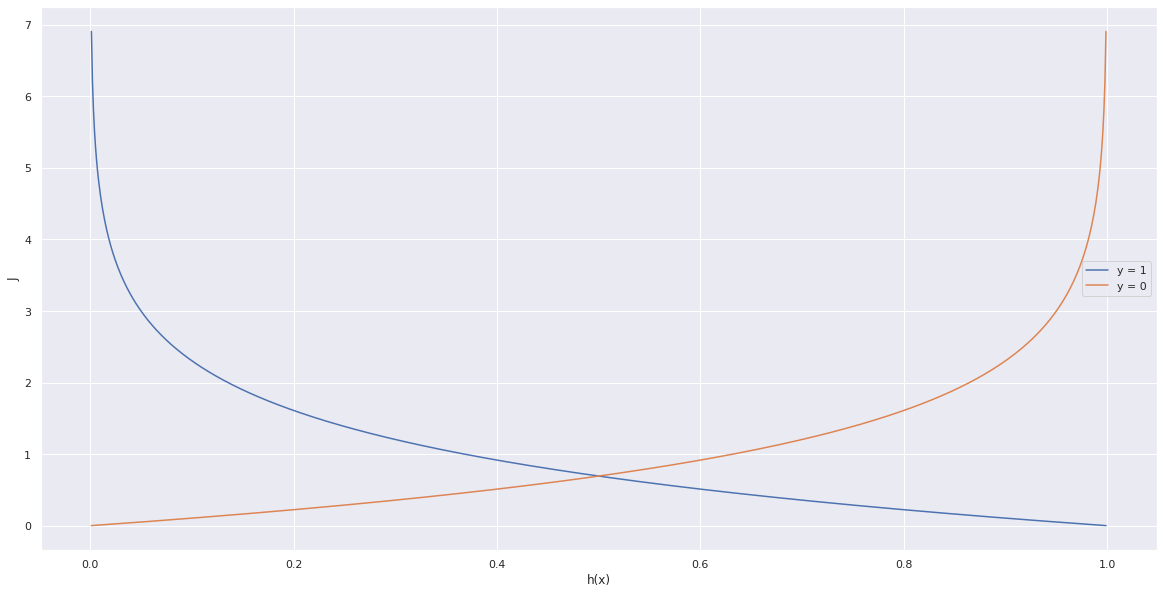

In [20]:
x = np.linspace(1e-3, 999e-3, 1000)
y_1 = -np.log(x)
y_0 = -np.log(1-x)
fig = plt.figure(figsize=(20,10))
plt.plot(x,y_1)
plt.plot(x,y_0)
plt.xlabel('h(x)')
plt.ylabel('J')
plt.legend(['y = 1', 'y = 0'])

Em termos formais:

$$J = 0, \hspace{1em} se \hspace{1em} h_\theta(x) = y$$
$$J \rightarrow \infty, \hspace{0.5em} se \hspace{0.5em} h_\theta(x) \rightarrow 0 \hspace{0.5em} e \hspace{0.5em} y= 1$$
$$J \rightarrow \infty, \hspace{0.5em} se \hspace{0.5em} h_\theta(x) \rightarrow 1 \hspace{0.5em} e \hspace{0.5em} y= 0$$

O impacto da alteração da função custo pode ser verificado com o script a seguir:

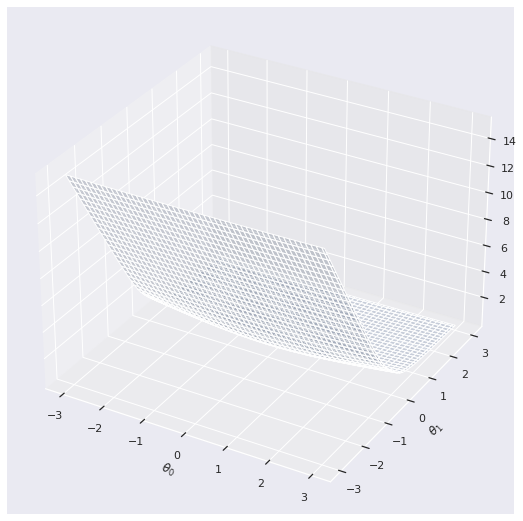

In [21]:
x = np.linspace(-10, 10, m).reshape(m, 1)
o1 = np.linspace(-3, 3, m)
o2 = o1
plot_cost(x, [o1, o2], y, logistic_regression_cost)

A função custo logarítmica facilita o processo de otimização com o gradiente descendente pois além de possuir elevada inclinação também é convexa. 

Um cuidado adicional deve ser tomado com relação a visualização das funções que dependem do operador $log$, afinal $log(0) \rightarrow \infty$. Uma alternativa para mitigar termos $nan$ é a função *nan_to_num* da biblioteca numpy, utilizada nestes exemplos.

### Gradiente Descendente

A utilização do gradiente descendente como forma de minimizar o custo do modelo depende primeiramente do cálculo do gradiente de $J$, o qual é desenvolvido a seguir. 

$$\theta = \theta - \alpha \nabla J(\theta)$$
$$\nabla J(\theta) = \begin{bmatrix} \frac{\partial J}{\partial \theta_1} &  ... & \frac{\partial J}{\partial \theta_n}\end{bmatrix}^T$$
$$\nabla J(\theta) = \frac{-1}{m} \sum\limits_{i=1}^{m} y^{i} \frac{\partial log(h_{\theta}(x^{i}))}{\partial \theta} + (1 - y^{i}) \frac{\partial log(1 - h_{\theta}(x^{i}))}{\partial \theta}$$
$$\nabla J(\theta) = \frac{-1}{m} \sum\limits_{i=1}^{m} \frac{y^{i}}{h_{\theta}(x^{i})} \frac{\partial h_{\theta}(x^{i})}{\partial \theta} + \frac{(1 - y^{i})}{1 - h_{\theta}(x^{i})} \frac{\partial (1 - h_{\theta}(x^{i}))}{\partial \theta}$$

Conforme já discutido, o modelo $h_\theta(x)$ para a regressão logística se trata da função sigmóide cuja derivada, para facilitar a notação, é desenvolvida em separado.  

$$g(z) = \frac{1}{1+e^{-z}}$$
$$\frac{\partial g(z)}{\partial z} = \frac{1}{(1+e^{-z})^2} \frac{\partial (1+e^{-z})}{\partial z}$$
$$\frac{\partial g(z)}{\partial z} = \frac{-e^{-z}}{(1+e^{-z})^2} \frac{\partial (-z)}{\partial z}$$
$$\frac{\partial g(z)}{\partial z} = \frac{e^{-z}}{(1+e^{-z})^2} = \frac{-1+1+e^{-z}}{(1+e^{-z})^2}$$
$$\frac{\partial g(z)}{\partial z} = \frac{1+e^{-z}}{(1+e^{-z})^2} - \frac{1}{(1+e^{-z})^2}$$
$$\frac{\partial g(z)}{\partial z} = \frac{1}{1+e^{-z}} - \frac{1}{1+e^{-z}} \frac{1}{1+e^{-z}}$$
$$\frac{\partial g(z)}{\partial z} = g(z) - g(z)^2 = g(z) (1 - g(z)) \frac{\partial (z)}{\partial z}$$

Reaplicando a derivada da função sigmóide na função custo, obtemos:

$$\nabla J(\theta) = \frac{-1}{m} \sum\limits_{i=1}^{m} \frac{y^{i}}{h_{\theta}(x^{i})} h_{\theta}(x^{i})(1 - h_{\theta}(x^{i})) \frac{\partial (\theta^T x^{i})}{\partial \theta} + \frac{-(1 - y^{i})}{1 - h_{\theta}(x^{i})} \frac{h_{\theta}(x^{i})(1 - h_{\theta}(x^{i})) \partial (\theta^T x^{i})}{\partial \theta}$$

$$\nabla J(\theta) = \frac{-1}{m} \sum\limits_{i=1}^{m} (y^{i} (1 - h_{\theta}(x^{i})) - h_{\theta}(x^{i}) (1 - y^{i})) \frac{\partial (\theta^T x^{i})}{\partial \theta}$$

$$\nabla J(\theta) = \frac{-1}{m} \sum\limits_{i=1}^{m} (y^{i} - y^{i} h_{\theta}(x^{i}) - h_{\theta}(x^{i}) + y^{i} h_{\theta}(x^{i})) \frac{\partial (\theta^T x^{i})}{\partial \theta}$$

$$\nabla J(\theta) = \begin{bmatrix} \frac{1}{m} \sum\limits_{i=1}^{m} (h_{\theta}(x^{i}) - y^{i}) x^{i} \end{bmatrix}^T$$

Enfim, podemos verificar que o gradiente da função custo logarítmica para regressão logística que é implementado a seguir, é o mesmo da regressão linear, exceto pelo modelo $h_\theta$, que na regressão logística é a função sigmóide.

In [46]:
def dJ(x, o, y):
    """
    Cost function gradient
    Arguments:
        x: np.array (mxn)
        o: np.array (n+1x1)
        y: np.array (mx1)
    Returns:
        np.array (n+1x1) (cost gradient)
    """
    m = np.shape(x)[0]
    h_x = h(x, o) # mx1
    e = h_x - y
    x = add_ones_column(x)
    return np.dot(np.transpose(x), e)*1/m

def gradient_descent(x, o, y, alpha, min_grad, max_iterations):
    """
    Gradient descent -> Discover what o minimize j
    Arguments:
        x: np.array (mxn)
        o: np.array (n+1x1)
        y: np.array (mx1)
        alpha: double (learning rate)
        min_grad: double (stop condition)
        max_iterations: int
    Returns:
        o: np.array (n+1x1)
        o_hist: np.array (n+1xi)
        i: int (iterations number)
    """
    i = 0
    o_hist = o
    grad = dJ(x, o, y)
    while np.linalg.norm(grad) > min_grad and i < max_iterations:
        o = o - alpha*grad
        o_hist = np.c_[o_hist, o] # append column

        grad = dJ(x, o, y)
        i += 1
        
    return [o, o_hist, i]

### Problema

A seguir é utilizada a regressão logística no problema de classificação binária de cães e gatos, ilustrado pela Figura 1 e composto pelo dataset disponível em: [datasets/classifier_binary/dogs_cats.csv](datasets/classifier_binary/dogs_cats.csv).

In [23]:
import pandas as pd

df = pd.read_csv('datasets/classifier_binary/dogs_cats.csv')
df.head()

,id,comprimento,peso,classe
0,0,45.231415,431.548671,cachorro
1,1,38.003753,517.870914,gato
2,2,53.608592,444.025762,cachorro
3,3,39.315731,524.066579,gato
4,4,45.581301,450.552000,cachorro


O dataset é composto de duas variáveis de entrada com o 'comprimento' e 'peso' do animal, além da saída desejada presente coluna 'classe'. Conforme já discutido, o modelo desenvolvido possui a capacidade de classificar somente saídas binárias, então uma etapa de pré-processamento dos dados se faz necessária.

O script a seguir mostra a distribuição dos dados, seleciona as variáveis de entrada do modelo e mapeia as saídas chachorro e gato no conjunto $\{0,1\}$, respectivamente.

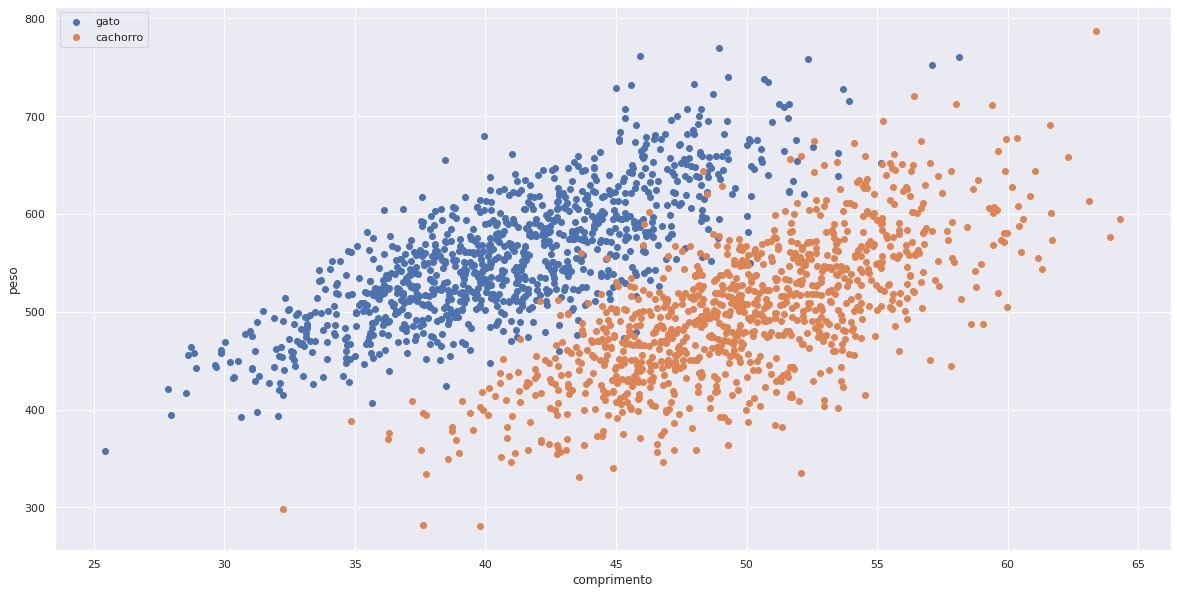

In [24]:
plt.figure(figsize=(20,10))

df['classe'].replace(['cachorro', 'gato'], [0, 1], inplace=True)
df_cats = df.loc[df['classe'] == 1]
df_dogs = df.loc[df['classe'] == 0]

plt.scatter(df_cats['comprimento'], df_cats['peso'])
plt.scatter(df_dogs['comprimento'], df_dogs['peso'])
plt.xlabel('comprimento')
plt.ylabel('peso')
plt.legend(['gato', 'cachorro'])

x = np.vstack(df[['comprimento', 'peso']].values) # mx2
y = np.vstack(df['classe'].values) # mx1

O script a seguir realiza a minimização da função custo através do gradiente descendente.

In [25]:
# config optimizer
o_start = np.array([[0],[0],[0]]) # arbitrary start
# config gradient descent
max_iterations = 10000
alpha = 1e-2
min_grad = 1e-1

[min_o, o_hist_gd, iterations] = gradient_descent(x, o_start, y, alpha, min_grad, max_iterations)
print('min_o:', min_o)
print('iterations:', iterations)

min_o: [[ -0.39509995]
 [-53.89274097]
 [  4.57610285]]
iterations: 1800


/tmp/ipykernel_1231877/2642940045.py:12: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))


O script a seguir implementa a **Acurácia**, o método mais simples de verificar a perfomance do modelo de classificação. Em breve, discutiremos métricas mais complexas e informativas para avaliação da perfomance dos modelos de classificação, em especial dos modelos muticlasse. 

$$ acurácia = acertos/(acertos + erros) $$

In [26]:
def accuracy(h_x, y):
    """
    Accuracy from classification
    Arguments:
        h_x: np.array (mx1)
        y: np.array (mx1)
    Returns:
        double
    """
    m = np.shape(h_x)[0]
    hints = 0
    for h_x_i, y_i in zip(h_x, y):
        if h_x_i == y_i:
            hints += 1
    return hints/m

Conforme já discutido, o modelo de regressão logística desenvolvido possui um conjunto imagem contínuo que pertence ao intervalo $\{0, 1\}$ e define a probabilidade da saída pertencer a classe $1$. Os dados de treinamento do problema, entretanto, possuem um domínio binário discreto. Sendo assim, para facilitar a avaliação de performance do modelo, é necessário aplicar uma função na saída do modelo para mapear o domínio contínuo no domínio discreto.

Uma função que cumpre este propósito é a função *heaviside* deslocada horizontalmente de 0.5 unidades, definida a seguir:

$$ binarize(x) = heaviside(x-0.5)=   \left\{
\begin{array}{ll}
      0 & x<0.5 \\
      1 & x \geq 0.5 \\
\end{array} 
\right.  $$

O script a seguir implementa a função de mapeamento, além de mostrar a sua curva de resposta para o conjunto imagem do modelo $h_\theta(x)$.

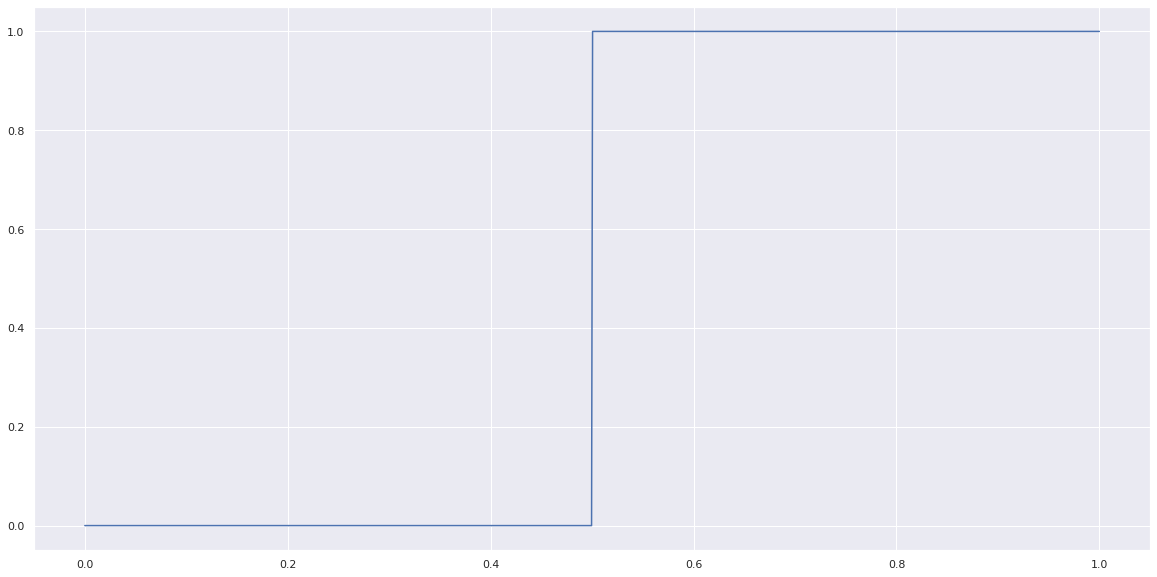

In [27]:
def binarize(x):
    """
    Continuous to discrete binary mapping (x >= 0.5 ? 1 : 0)
    Arguments:
        x: np.array (mx1)
    Returns:
        np.array (mx1)
    """
    return np.heaviside(x-0.5, 1)

h_x_image = np.linspace(0, 1, 1000)
plt.figure(figsize=(20,10))
plt.plot(h_x_image, binarize(h_x_image))

Enfim, o script abaixo verifica a acurácia e mostra a fronteira de decisão do modelo de classificação obtido.

accuracy:  0.964


/tmp/ipykernel_1231877/2642940045.py:12: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))


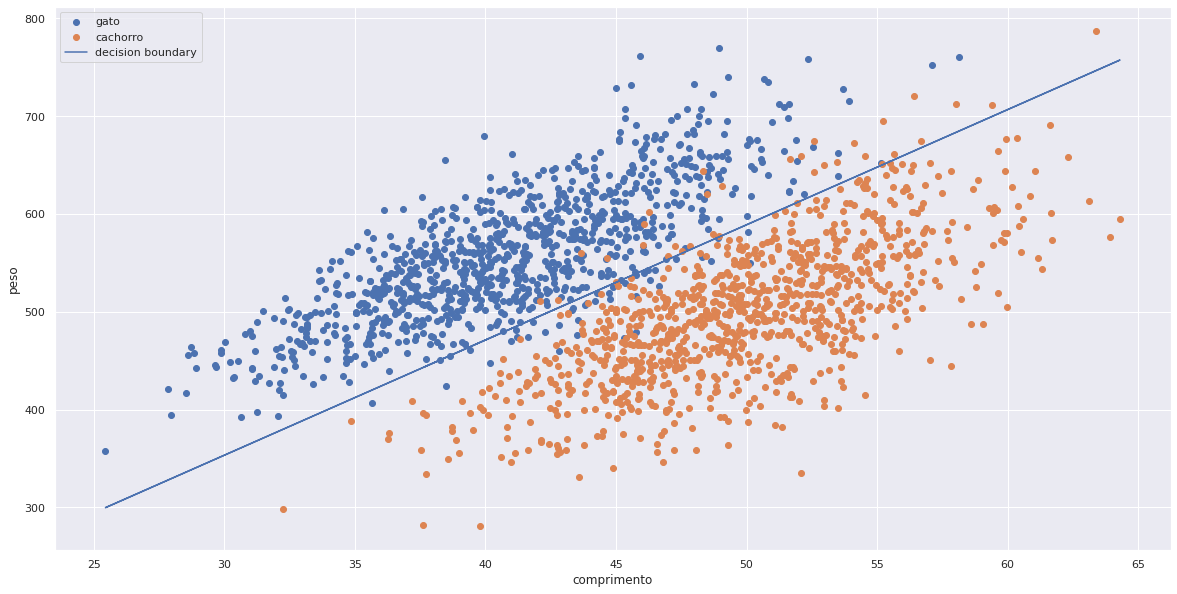

In [28]:
h_x = h(x, min_o)
h_x_discreet = binarize(h_x)
print('accuracy: ', accuracy(h_x_discreet, y))

plt.figure(figsize=(20,10))

plt.scatter(df_cats['comprimento'], df_cats['peso'])
plt.scatter(df_dogs['comprimento'], df_dogs['peso'])

bd = boundary_decision(x, min_o)
plt.plot(x[:, 0], bd)

plt.xlabel('comprimento')
plt.ylabel('peso')
plt.legend(['gato', 'cachorro', 'decision boundary'])

A acurácia obtida indica que o modelo acertou 96,4% das classificações quando aplicado sobre os dados do dataset.

## Classificação Multiclasse

No classificador multiclasse o modelo deve ser capaz de decidir a qual classe os dados de entrada estão a associados. Em outras palavras, o modelo deve possuir uma saída discreta $y \in \{0, 1, 2, ..., c\}$. Uma abordagem utilizada para composição de classificadores multiclasse é a *Um-Contra-Todos*, detalhada a seguir. 

<img src="imgs/multiclass_classification.png" alt="linear_model" width="200" style="display:block; margin:auto"/>

<div align="center">
Classificador Multiclasse</div>

### Um-Contra-Todos

Nesta abordagem são criados $c$ modelos de classificação binária, um para cada classe presente no problema. Os dados de treinamento são então replicados em $c$ grupos com somente uma classe positiva por grupo, as demais classes do grupo são modificadas para pertencerem a classe negativa. Ao final, cada modelo é treinado com um grupo de dados e se especializa na identificação de uma determinada classe.

$$h^0_\theta(x) = P(y = 0| x; \theta)$$
$$h^1_\theta(x) = P(y = 1| x; \theta)$$
$$h^2_\theta(x) = P(y = 2| x; \theta)$$
$$h^c_\theta(x) = P(y = c| x; \theta)$$

Cada modelo $h_\theta^i(x)$ irá resultar na probabilidade do conjunto de dados $x$ estar associado a classe $y$ com a qual o modelo foi treinado. Sendo assim, é plausível que o retorno do classificador multiclasse seja dado pelo modelo com maior probabilidade:

$$h_\theta(x) = i \rightarrow max(h^i_\theta(x))$$

### Problema

A seguir é utilizada a regressão logística no problema de classificação multiclasse de frutas, ilustrado pela abaixo e composto pelo dataset disponível em: [datasets/classifier_multiclass/fruits.csv](datasets/classifier_multiclass/fruits.csv).

In [44]:
df = pd.read_csv('datasets/classifier_multiclass/fruits.csv')
df.head()

,mass,width,height,color_score,fruit_name
0,192,8.4,7.3,0.55,apple
1,180,8.0,6.8,0.59,apple
2,86,6.2,4.7,0.80,mandarin
3,84,6.0,4.6,0.79,mandarin
4,80,5.8,4.3,0.77,mandarin


Pela inspeção do dataset acima é possível verificar a existência de quatro atributos (*mass*, *width*, *height* e *color_score*), associados a saída presente na coluna *fruit_name*. O script a seguir mostra a distribuição dos dados agrupando os atributos dois a dois.

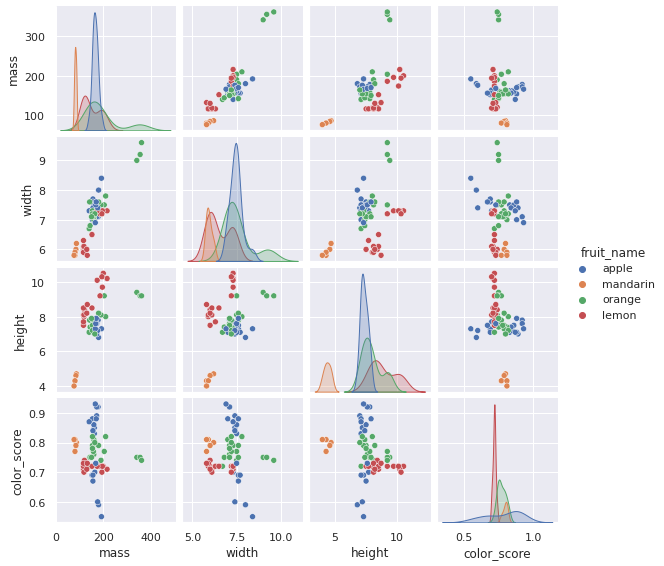

In [49]:
import seaborn as sns; sns.set()
sns.pairplot(df, hue='fruit_name', height=2)

Com a inspeção da figura acima é possível verificar a existência de quatro tipos diferentes de frutas (*apple*, *mandarin*, *orange*, *lemon*), ou seja, se trata de um problema de classificação com $c = 4$. Ademais, com a análise dos gráficos acima, em especial do gráfico de *height* x *width*, é possível separar somente as frutas *mandarin* e *lemon* o que ilustra a dificuldade do problema.

O script abaixo é responsável por realizar o treinamento dos modelos de classificação binária.

In [70]:
class Model:
    def __init__(self, name, o):
        """
        Logistic regression binary model
        Arguments:
            name: text
            o: np.array (n+1x1)
        Returns:
        """
        self.name = name
        self.o = o

def train(x, y, class_name):
    """
    Train logistic regression binary model
    Arguments:
        x: np.array (mxn)
        y: np.array (mx1)
        class_name: text
    Returns:
        Model object
    """

    y = np.where(y == class_name, int(1), y) # positive class
    y = np.where(y != class_name, int(0), y) # negative class
    y = np.vstack([int(y_str) for y_str in y])

    # config optimizer
    o_start = np.array([[0],[0],[0],[0],[0]]) # arbitrary start
    # config gradient descent
    max_iterations = 10000
    alpha = 1e-2
    min_grad = 1e-1

    [min_o, o_hist_gd, iterations] = gradient_descent(x, o_start, y, alpha, min_grad, max_iterations)

    h_x = binarize(h(x, min_o))
    return Model(class_name, min_o)

x = np.vstack(df[['mass', 'width', 'height', 'color_score']].values) # mx4
y = np.vstack(df['fruit_name'].values) # mx1

models = []
for class_name in df['fruit_name'].unique():
    model = train(x, y, class_name)
    models.append(model)